# Quickstart for model monitoring documentation

Welcome! Let's get you started with the basic process of monitoring the production models with ValidMind.

You will learn how to initialize the ValidMind Developer Framework, load a sample dataset and model to monitor a simple classification model, and then run a ValidMind test suite to quickly generate monitoring documentation about the new data and model.

This notebook uses the [Bank Customer Churn Prediction](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data) sample dataset from Kaggle to train the classification model.

<a id='toc1_'></a>

## About ValidMind

ValidMind is a platform for managing model risk, including risk associated with AI and statistical models.

You use the ValidMind Developer Framework to automate documentation, validation, monitoring tests, and then use the ValidMind AI Risk Platform UI to collaborate on model documentation. Together, these products simplify model risk management, facilitate compliance with regulations and institutional standards, and enhance collaboration between yourself and model validators.

<a id='toc1_1_'></a>

### Before you begin

This notebook assumes you have basic familiarity with Python, including an understanding of how functions work. If you are new to Python, you can still run the notebook but we recommend further familiarizing yourself with the language. 

If you encounter errors due to missing modules in your Python environment, install the modules with `pip install`, and then re-run the notebook. For more help, refer to [Installing Python Modules](https://docs.python.org/3/installing/index.html).

<a id='toc1_2_'></a>

### New to ValidMind?

If you haven't already seen our [Get started with the ValidMind Developer Framework](https://docs.validmind.ai/developer/get-started-developer-framework.html), we recommend you explore the available resources for developers at some point. There, you can learn more about documenting models, find code samples, or read our developer reference.

<div class="alert alert-block alert-info" style="background-color: #f7e4ee; color: black; border: 1px solid black;">For access to all features available in this notebook, create a free ValidMind account.

Signing up is FREE — <a href="https://app.prod.validmind.ai"><b>Sign up now</b></a></div>

<a id='toc1_3_'></a>

### Key concepts

**Model documentation**: A structured and detailed record pertaining to a model, encompassing key components such as its underlying assumptions, methodologies, data sources, inputs, performance metrics, evaluations, limitations, and intended uses. It serves to ensure transparency, adherence to regulatory requirements, and a clear understanding of potential risks associated with the model’s application.

**Documentation template**: Functions as a test suite and lays out the structure of model documentation, segmented into various sections and sub-sections. Documentation templates define the structure of your model documentation, specifying the tests that should be run, and how the results should be displayed.

**Model monitoring documentation**: A comprehensive and structured record of a production model, including key elements such as data sources, inputs, performance metrics, and periodic evaluations. This documentation ensures transparency and visibility of the model's performance in the production environment.

**Monitoring documentation template**: Similar to documentation template, The monitoring documentation template functions as a test suite and lays out the structure of model monitoring documentation, segmented into various sections and sub-sections. Monitoring documentation templates define the structure of your model monitoring documentation, specifying the tests that should be run, and how the results should be displayed.

**Tests**: A function contained in the ValidMind Developer Framework, designed to run a specific quantitative test on the dataset or model. Tests are the building blocks of ValidMind, used to evaluate and document models and datasets, and can be run individually or as part of a suite defined by your model documentation template.

**Custom tests**: Custom tests are functions that you define to evaluate your model or dataset. These functions can be registered with ValidMind to be used in the platform.

**Inputs**: Objects to be evaluated and documented in the ValidMind framework. They can be any of the following:

  - **model**: A single model that has been initialized in ValidMind with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model).
  - **dataset**: Single dataset that has been initialized in ValidMind with [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset).
  - **models**: A list of ValidMind models - usually this is used when you want to compare multiple models in your custom test.
  - **datasets**: A list of ValidMind datasets - usually this is used when you want to compare multiple datasets in your custom test. See this [example](https://docs.validmind.ai/notebooks/how_to/run_tests_that_require_multiple_datasets.html) for more information.

**Parameters**: Additional arguments that can be passed when running a ValidMind test, used to pass additional information to a test, customize its behavior, or provide additional context.

**Outputs**: Custom tests can return elements like tables or plots. Tables may be a list of dictionaries (each representing a row) or a pandas DataFrame. Plots may be matplotlib or plotly figures.

**Test suites**: Collections of tests designed to run together to automate and generate model documentation end-to-end for specific use-cases.

Example: the [`classifier_full_suite`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html#ClassifierFullSuite) test suite runs tests from the [`tabular_dataset`](https://docs.validmind.ai/validmind/validmind/test_suites/tabular_datasets.html) and [`classifier`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html) test suites to fully document the data and model sections for binary classification model use-cases.


<a id='toc2_'></a>

## Install the client library

The client library provides Python support for the ValidMind Developer Framework. To install it:


In [1]:
# %pip install -q validmind

<a id='toc3_'></a>

## Initialize the client library

ValidMind generates a unique _code snippet_ for each registered model to connect with your developer environment. You initialize the client library with this code snippet, which ensures that your documentation and tests are uploaded to the correct model when you run the notebook.

<a id='toc3_1_'></a>

### Get your code snippet

1. In a browser, log into the [Platform UI](https://app.prod.validmind.ai).

2. In the left sidebar, navigate to **Model Inventory** and click the **+ registed model**.

3. Go to **Getting Started** and click **Copy snippet to clipboard**.

4. Add **monitoring=True** parameter in the **vm.init** method.

Next, replace this placeholder with your own code snippet:


In [2]:
import validmind as vm

vm.init(
  api_host = "...",
  api_key = "...",
  api_secret = "...",
  project = "...",
  monitoring=True
)

2024-08-02 22:19:27,504 - INFO(validmind.api_client): Connected to ValidMind... Current Model: Model Monitoring Churn Demo - Initial Validation (clyt0vgza00v921jrtp343kuh)


<a id='toc4_'></a>

## Initialize the Python environment

Next, let's import the necessary libraries and set up your Python environment for data analysis:


In [35]:
import xgboost as xgb
import validmind as vm
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from validmind.tests import run_test

%matplotlib inline

<a id='toc4_1_'></a>

### Preview the monitoring template

A template predefines sections for your model monitoring documentation and provides a general outline to follow, making the documentation process much easier.

You will upload documentation and test results into this template later on. For now, take a look at the structure that the template provides with the `vm.preview_template()` function from the ValidMind library and note the empty sections:


In [5]:
vm.preview_template()

2024-07-30 18:53:24,913 - ERROR(validmind.tests.load): Unable to load test mr_custom.target_prediction_distribution_plot. No test provider found.
2024-07-30 18:53:25,105 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Correlation_Changes. No test provider found.
2024-07-30 18:53:25,107 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Across_Each_Feature. No test provider found.
2024-07-30 18:53:25,109 - ERROR(validmind.tests.load): Unable to load test mr_custom.Feature_Drift. No test provider found.


Accordion(children=(Accordion(children=(VBox(children=(HTML(value='\n<div\n  class="lm-Widget p-Widget jupyter…

## Load the reference and monitoring datasets

The sample dataset used here is provided by the ValidMind library. To be able to use it, you need to import the dataset and load it into a pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), a two-dimensional tabular data structure that makes use of rows and columns:


<a id='toc6_'></a>

## Document the model monitoring

As part of documenting the model with the ValidMind Developer Framework, you need to preprocess the raw dataset, initialize some training, reference and monitoring datasets, initialize a model object you can use for testing, and then run the full suite of tests.


In [ ]:
from validmind.datasets.classification import customer_churn
raw_df = customer_churn.load_data()

<a id='toc6_1_'></a>

### Prepocess the raw dataset

Preprocessing performs a number of operations to get ready for the subsequent steps:

- Preprocess the data: Splits the DataFrame (`df`) into multiple datasets (`train_df`, `reference_df`, and `monitor_df`) using `demo_dataset.preprocess` to simplify preprocessing.


In [3]:
# Import the sample dataset from the library

train_df, reference_df, monitor_df = customer_churn.preprocess(raw_df)

NameError: name 'customer_churn' is not defined

### Load the production model

In [16]:
import xgboost as xgb

# Load the saved model
model = xgb.XGBClassifier()
model.load_model('xgboost_model.model')

<a id='toc6_2_'></a>

### Initialize the ValidMind datasets

Before you can run tests, you must first initialize a ValidMind dataset object using the [`init_dataset`](https://docs.validmind.ai/validmind/validmind.html#init_dataset) function from the ValidMind (`vm`) module.

This function takes a number of arguments:

- `dataset` — the raw dataset that you want to provide as input to tests
- `input_id` - a unique identifier that allows tracking what inputs are used when running each individual test
- `target_column` — a required argument if tests require access to true values. This is the name of the target column in the dataset
- `class_labels` — an optional value to map predicted classes to class labels

With all datasets ready, you can now initialize training, reference(test) and monitor datasets (`train_df`, `reference_df` and `monitor_df`) created earlier into their own dataset objects using [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset):


In [43]:
vm_train_ds = vm.init_dataset(
    dataset=train_df, input_id="train_df", target_column=customer_churn.target_column
)

vm_reference_ds = vm.init_dataset(
    dataset=reference_df, input_id="reference_df", target_column=customer_churn.target_column
)


vm_monitor_ds = vm.init_dataset(
    dataset=monitor_df, input_id="monitor_dataset", target_column=customer_churn.target_column
)

2024-07-30 19:44:06,160 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-07-30 19:44:06,544 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-07-30 19:44:06,713 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


<a id='toc6_3_'></a>

### Initialize a model object

Additionally, you need to initialize a ValidMind model object (`vm_model`) that can be passed to other functions for analysis and tests on the data. You simply intialize this model object with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model):


In [19]:
vm_model = vm.init_model(
    model,
    input_id="model",
)

<a id='toc6_4_'></a>

### Assign predictions to the datasets

We can now use the assign_predictions() method from the Dataset object to link existing predictions to any model. If no prediction values are passed, the method will compute predictions automatically:


In [27]:
vm_train_ds.assign_predictions(
    model=vm_model,
)

vm_reference_ds.assign_predictions(
    model=vm_model,
)

vm_monitor_ds.assign_predictions(
    model=vm_model,
)

2024-07-30 19:05:54,619 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
2024-07-30 19:05:54,622 - INFO(validmind.vm_models.dataset.utils): Done running predict_proba()
2024-07-30 19:05:54,622 - INFO(validmind.vm_models.dataset.utils): Running predict()... This may take a while
2024-07-30 19:05:54,624 - INFO(validmind.vm_models.dataset.utils): Done running predict()
2024-07-30 19:05:54,625 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
2024-07-30 19:05:54,626 - INFO(validmind.vm_models.dataset.utils): Done running predict_proba()
2024-07-30 19:05:54,626 - INFO(validmind.vm_models.dataset.utils): Running predict()... This may take a while
2024-07-30 19:05:54,628 - INFO(validmind.vm_models.dataset.utils): Done running predict()
2024-07-30 19:05:54,629 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
2024-07-30 19:05:54,630 - INFO(validmind.vm_models.dataset.u

<a id='toc6_5_'></a>

### Run the full suite of tests

This is where it all comes together: you are now ready to run the documentation tests for the model as defined by the monitoring template you looked at earlier.

The [`vm.run_documentation_tests`](https://docs.validmind.ai/validmind/validmind.html#run_documentation_tests) function finds and runs every test specified in the template and then uploads all the documentation and test artifacts that get generated to the ValidMind AI Risk Platform.

The function requires information about the inputs to use on every test. These inputs can be passed as an `inputs` argument if we want to use the same inputs for all tests. It's also possible to pass a `config` argument that has information about the `params` and `inputs` that each test requires. The `config` parameter is a dictionary with the following structure:

```python
config = {
    "<test-id>": {
        "params": {
            "param1": "value1",
            "param2": "value2",
            ...
        },
        "inputs": {
            "input1": "value1",
            "input2": "value2",
            ...
        }
    },
    ...
}
```

Each `<test-id>` above corresponds to the test driven block identifiers shown by `vm.preview_template()`. For this model, we will use the default parameters for all tests, but we'll need to specify the input configuration for each one. The method `get_demo_test_config()` below constructs the default input configuration for our demo.


In [21]:
from validmind.utils import preview_test_config

test_config = customer_churn.get_demo_test_config()
preview_test_config(test_config)

2024-07-30 18:59:43,108 - ERROR(validmind.tests.load): Unable to load test mr_custom.target_prediction_distribution_plot. No test provider found.
2024-07-30 18:59:43,115 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Correlation_Changes. No test provider found.
2024-07-30 18:59:43,124 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Across_Each_Feature. No test provider found.
2024-07-30 18:59:43,131 - ERROR(validmind.tests.load): Unable to load test mr_custom.Feature_Drift. No test provider found.


Before we start the testing procedure let's take a look at the expected tests that are pre-configured:

In [22]:
test_dict = vm.get_test_suite().get_default_config()
for l in test_dict:
    print(l)

2024-07-30 19:00:33,284 - ERROR(validmind.tests.load): Unable to load test mr_custom.target_prediction_distribution_plot. No test provider found.
2024-07-30 19:00:33,287 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Correlation_Changes. No test provider found.
2024-07-30 19:00:33,290 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Across_Each_Feature. No test provider found.
2024-07-30 19:00:33,292 - ERROR(validmind.tests.load): Unable to load test mr_custom.Feature_Drift. No test provider found.


validmind.model_validation.ModelMetadata
validmind.data_validation.DatasetDescription
validmind.data_validation.Duplicates
validmind.data_validation.HighCardinality
validmind.data_validation.MissingValues
validmind.data_validation.Skewness
validmind.data_validation.UniqueRows
validmind.data_validation.TooManyZeroValues
validmind.data_validation.IQROutliersTable
validmind.data_validation.HighPearsonCorrelation:train_vs_test
validmind.data_validation.PearsonCorrelationMatrix:train_vs_test
validmind.model_validation.sklearn.PopulationStabilityIndex
mr_custom.target_prediction_distribution_plot
mr_custom.Prediction_Correlation_Changes
mr_custom.Prediction_Across_Each_Feature
mr_custom.Feature_Drift
validmind.model_validation.sklearn.ConfusionMatrix:train_vs_test
validmind.model_validation.sklearn.ClassifierPerformance:train_vs_test
validmind.model_validation.sklearn.PrecisionRecallCurve:train_vs_test
validmind.model_validation.sklearn.ROCCurve:train_vs_test
validmind.model_validation.sklea

let's run the first test in the "test_dict"


In [23]:
test_result = vm.tests.run_test('validmind.model_validation.ModelMetadata', model= vm_model).log()

Let's run the tests needed to determine data quality of the monitoring dataset:


In [24]:
data_qual = vm.get_test_suite(section='prediction_data_description').get_default_config()

#now let's run all of the necessary data quality checks where the monitoring dataset is the basis
for l in data_qual:
    vm.tests.run_test(
    l, input_grid={
        "dataset": [vm_monitor_ds],
        "model": [vm_model],
    },
    show=False).log()
    print("completed test: {0}".format(l))


completed test: validmind.data_validation.DatasetDescription
completed test: validmind.data_validation.Duplicates
completed test: validmind.data_validation.HighCardinality
completed test: validmind.data_validation.MissingValues
completed test: validmind.data_validation.Skewness
completed test: validmind.data_validation.UniqueRows
completed test: validmind.data_validation.TooManyZeroValues
completed test: validmind.data_validation.IQROutliersTable


Next, let's run the types of tests are comparison tests, i.e. we want to compare charactersitics based on the train dataset and monitoring dataset

In [28]:
corr = ['validmind.data_validation.PearsonCorrelationMatrix:train_vs_test','validmind.data_validation.HighPearsonCorrelation:train_vs_test']

for c in corr:
    vm.tests.run_test(c,input_grid={"dataset": [vm_train_ds,vm_monitor_ds],"model": [vm_model],},show=False).log()
    print('Test completed for {0}'.format(c))

Test completed for validmind.data_validation.PearsonCorrelationMatrix:train_vs_test
Test completed for validmind.data_validation.HighPearsonCorrelation:train_vs_test


### Conduct Target and Feature Drift testing
Next the goal is to investigate the distributional characterstics of predictions and features in order to see if the underlying data has changed. These tests are important in determining the expected accuracy of the model.
1. For target drift we want to compare the dataset used for testing (reference data) relative to the monitoring data.
2. For feature drift we want to compare the train dataset vs. monitoring data, the reason is that features have been used to train the model, and if these are "drifting" then potential issues may arise as underlying patterns used to train model has changed

Now let's continue with Target drift and as observed only one pre-configured test is being utilized

In [29]:
for l in vm.get_test_suite(section='comparison_data_target').get_default_config():
    print(l)

2024-07-30 19:07:38,900 - ERROR(validmind.tests.load): Unable to load test mr_custom.target_prediction_distribution_plot. No test provider found.
2024-07-30 19:07:38,905 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Correlation_Changes. No test provider found.
2024-07-30 19:07:38,909 - ERROR(validmind.tests.load): Unable to load test mr_custom.Prediction_Across_Each_Feature. No test provider found.


validmind.model_validation.sklearn.PopulationStabilityIndex
mr_custom.target_prediction_distribution_plot
mr_custom.Prediction_Correlation_Changes
mr_custom.Prediction_Across_Each_Feature


Let's run the PSI for predictions and in this case we want to compare the test data vs. monitoring data (Note for predictions, therefore training data is irrelevant)


In [30]:
vm.tests.run_test(
    "validmind.model_validation.sklearn.PopulationStabilityIndex",
    input_grid={
        "datasets": [
            [vm_reference_ds, vm_monitor_ds],
        ],
        "model": [vm_model],
    },show=False
).log()

Next we want to add some tests that are not availble out-of-the box in ValidMind. In particular correlation of features and predictions is of interest and if we see large changes it can trigger an deeper assessment


In [5]:
# @vm.test("mr_custom.target_prediction_distribution_plot")
# def target_drift(vm_reference_ds,vm_monitor_ds):
#     """
#     This test provides the prediction distributions from the reference dataset and the new monitoring dataset. If there are significant differences in the distributions then it might indicate of different underlying data characteristics that might lead to
#     further investigation into the root causes.

#     """

#     pred_ref = vm_reference_ds.y_prob_df(vm_model)
#     pred_ref.columns = ['Reference Prediction']
#     pred_monitor = vm_monitor_ds.y_prob_df(vm_model)
#     pred_monitor.columns = ['Monitoring Prediction']

#     fig = plt.figure()
#     plot = sns.kdeplot(pred_ref['Reference Prediction'], shade=True,label='Reference Prediction')
#     plot = sns.kdeplot(pred_monitor['Monitoring Prediction'], shade=True,label='Monitor Prediction')
#     plot.set(xlabel='Prediction',title="Distribution of Reference & Monitor Predictions")
#     plot.legend()

#     return fig

In [8]:
# target_drift.save(
#     "/Users/anilsorathiya/work/validmind/repos/developer-framework/validmind/tests/model_monitor",
#     imports=["import matplotlib.pyplot as plt", "import seaborn as sns"],
# )

2024-08-05 12:40:06,596 - INFO(validmind.tests.decorator): Saved to /Users/anilsorathiya/work/validmind/repos/developer-framework/validmind/tests/model_monitor/target_prediction_distribution_plot.py!Be sure to add any necessary imports to the top of the file.
2024-08-05 12:40:06,597 - INFO(validmind.tests.decorator): This metric can be run with the ID: <test_provider_namespace>.target_prediction_distribution_plot


In [9]:
vm.tests.run_test(
    "validmind.model_monitor.TargetPredictionDistributionPlot",
    input_grid={
        "datasets": [
            [vm_reference_ds, vm_monitor_ds],
        ],
        "model": [vm_model],
    },
    show=False,

).log(section_id='comparison_data_target')

NameError: name 'vm_reference_ds' is not defined

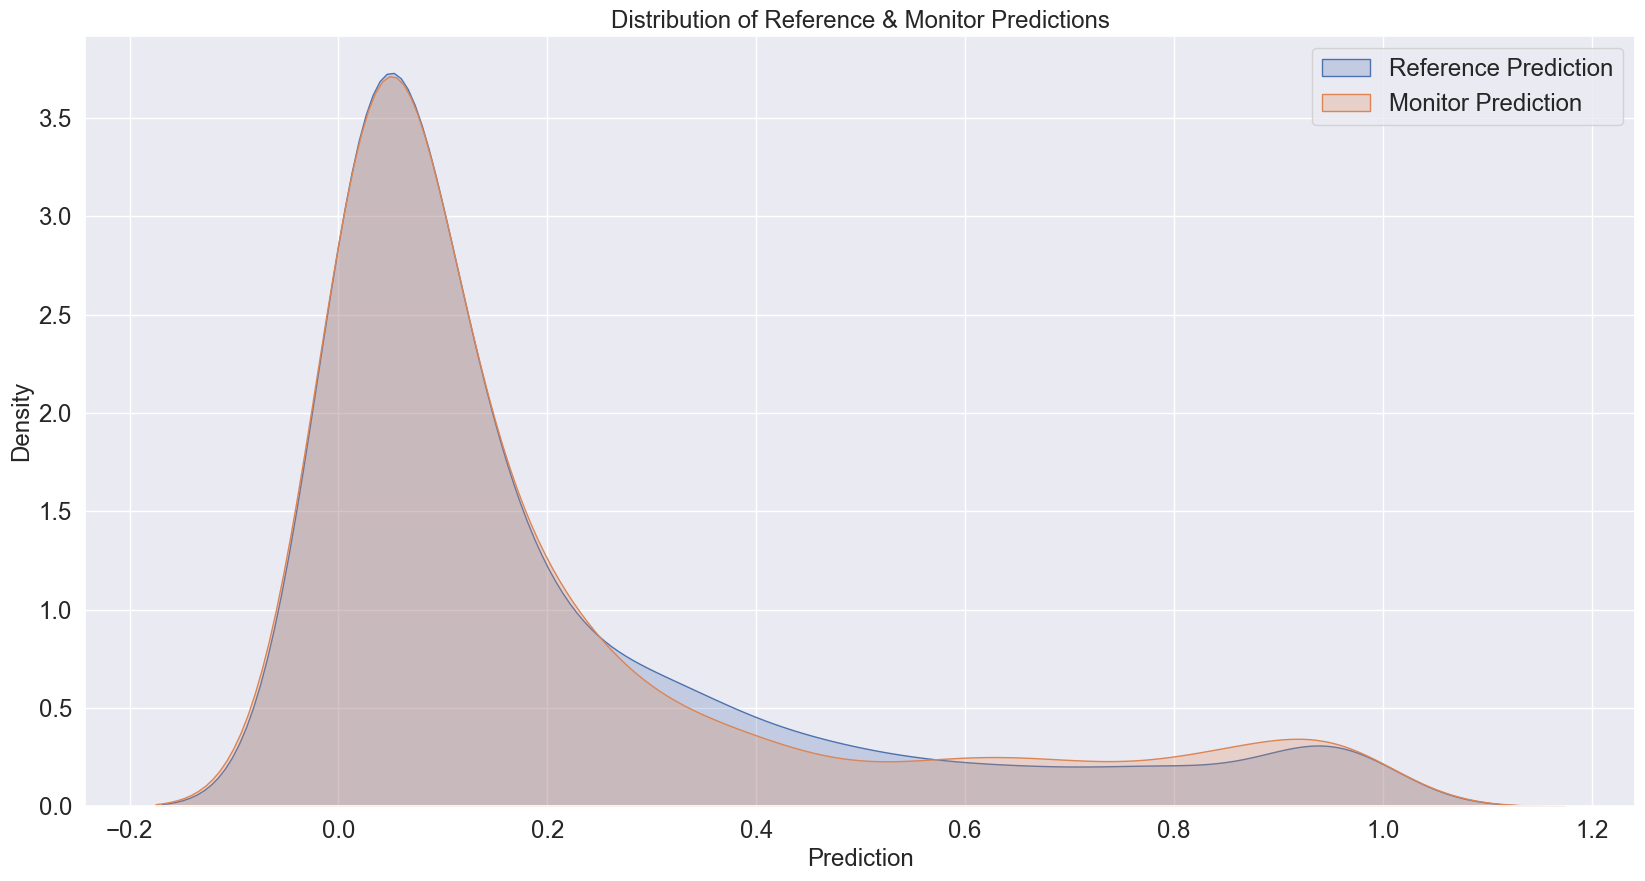

In [ ]:

# result = run_test('mr_custom.target_prediction_distribution_plot',params={'vm_reference_ds':vm_reference_ds,'vm_monitor_ds':vm_monitor_ds},show=False).log(section_id='comparison_data_target')

Now we want to add a custom test showing difference in correlation pairs between model prediction and features


In [10]:
# @vm.test("mr_custom.Prediction_Correlation_Changes")
# def correlation_target(vm_reference_ds,vm_monitor_ds):

#         """ 
#         This test shows the correlation pairs for each feature in the model and model predictions from reference dataset and monitoring dataset. The primary goal in this test is to assess if correlation pairs between predictions from reference to monitoring have
#         changed significantly. If there is a large change between correlation pairs then there is a heightened risk of target drift which can result in lower performing models.

#         The primary goal is to assess the predictions and each individual feature in the two predictions in order to detect a change in the relationship between target and feature.

        
#         """
#         df_corr = vm_reference_ds.df.corr()
#         df_corr= df_corr[['model_probabilities']]

#         df_corr2 = vm_monitor_ds.df.corr()
#         df_corr2= df_corr2[['model_probabilities']]

#         corr_final = df_corr.merge(df_corr2,left_index=True,right_index=True)
#         corr_final.columns = ['Reference Predictions','Monitoring Predictions']
#         corr_final = corr_final.drop(index=['model_prediction','model_probabilities'])

#         import matplotlib.pyplot as plt 

#         n=len(corr_final)
#         r = np.arange(n) 
#         width = 0.25

#         fig = plt.figure()

#         plt.bar(r, corr_final['Reference Predictions'], color = 'b', 
#                 width = width, edgecolor = 'black', 
#                 label='Reference Prediction Correlation') 
#         plt.bar(r + width, corr_final['Monitoring Predictions'], color = 'g', 
#                 width = width, edgecolor = 'black', 
#                 label='Monitoring Prediction Correlation') 


#         plt.xlabel("Features") 
#         plt.ylabel("Correlation") 
#         plt.title("Correlation between Predictions and Features") 

#         features = corr_final.index.to_list()
#         plt.xticks(r + width/2,features,rotation=45)
#         plt.legend()
#         plt.tight_layout()

#         corr_final['Features'] = corr_final.index
#         corr_final = corr_final[['Features','Reference Predictions','Monitoring Predictions']]
#         return({"Correlation Pair Table":corr_final},fig)

In [12]:
# correlation_target.save(
#     "/Users/anilsorathiya/work/validmind/repos/developer-framework/validmind/tests/model_monitor",
#     imports=["import matplotlib.pyplot as plt", "import pandas as pd"],
# )

2024-08-05 14:22:22,095 - INFO(validmind.tests.decorator): Saved to /Users/anilsorathiya/work/validmind/repos/developer-framework/validmind/tests/model_monitor/Prediction_Correlation_Changes.py!Be sure to add any necessary imports to the top of the file.
2024-08-05 14:22:22,096 - INFO(validmind.tests.decorator): This metric can be run with the ID: <test_provider_namespace>.Prediction_Correlation_Changes


In [ ]:
vm.tests.run_test(
    "validmind.model_monitor.PredictionCorrelation",
    input_grid={
        "datasets": [
            [vm_reference_ds, vm_monitor_ds],
        ],
    },
    show=False,
).log(section_id='comparison_data_target')

2024-07-30 19:10:04,299 - INFO(validmind.vm_models.test.result_wrapper): Test driven block with content_id mr_custom.Prediction_Correlation_Changes already exists in the document's section


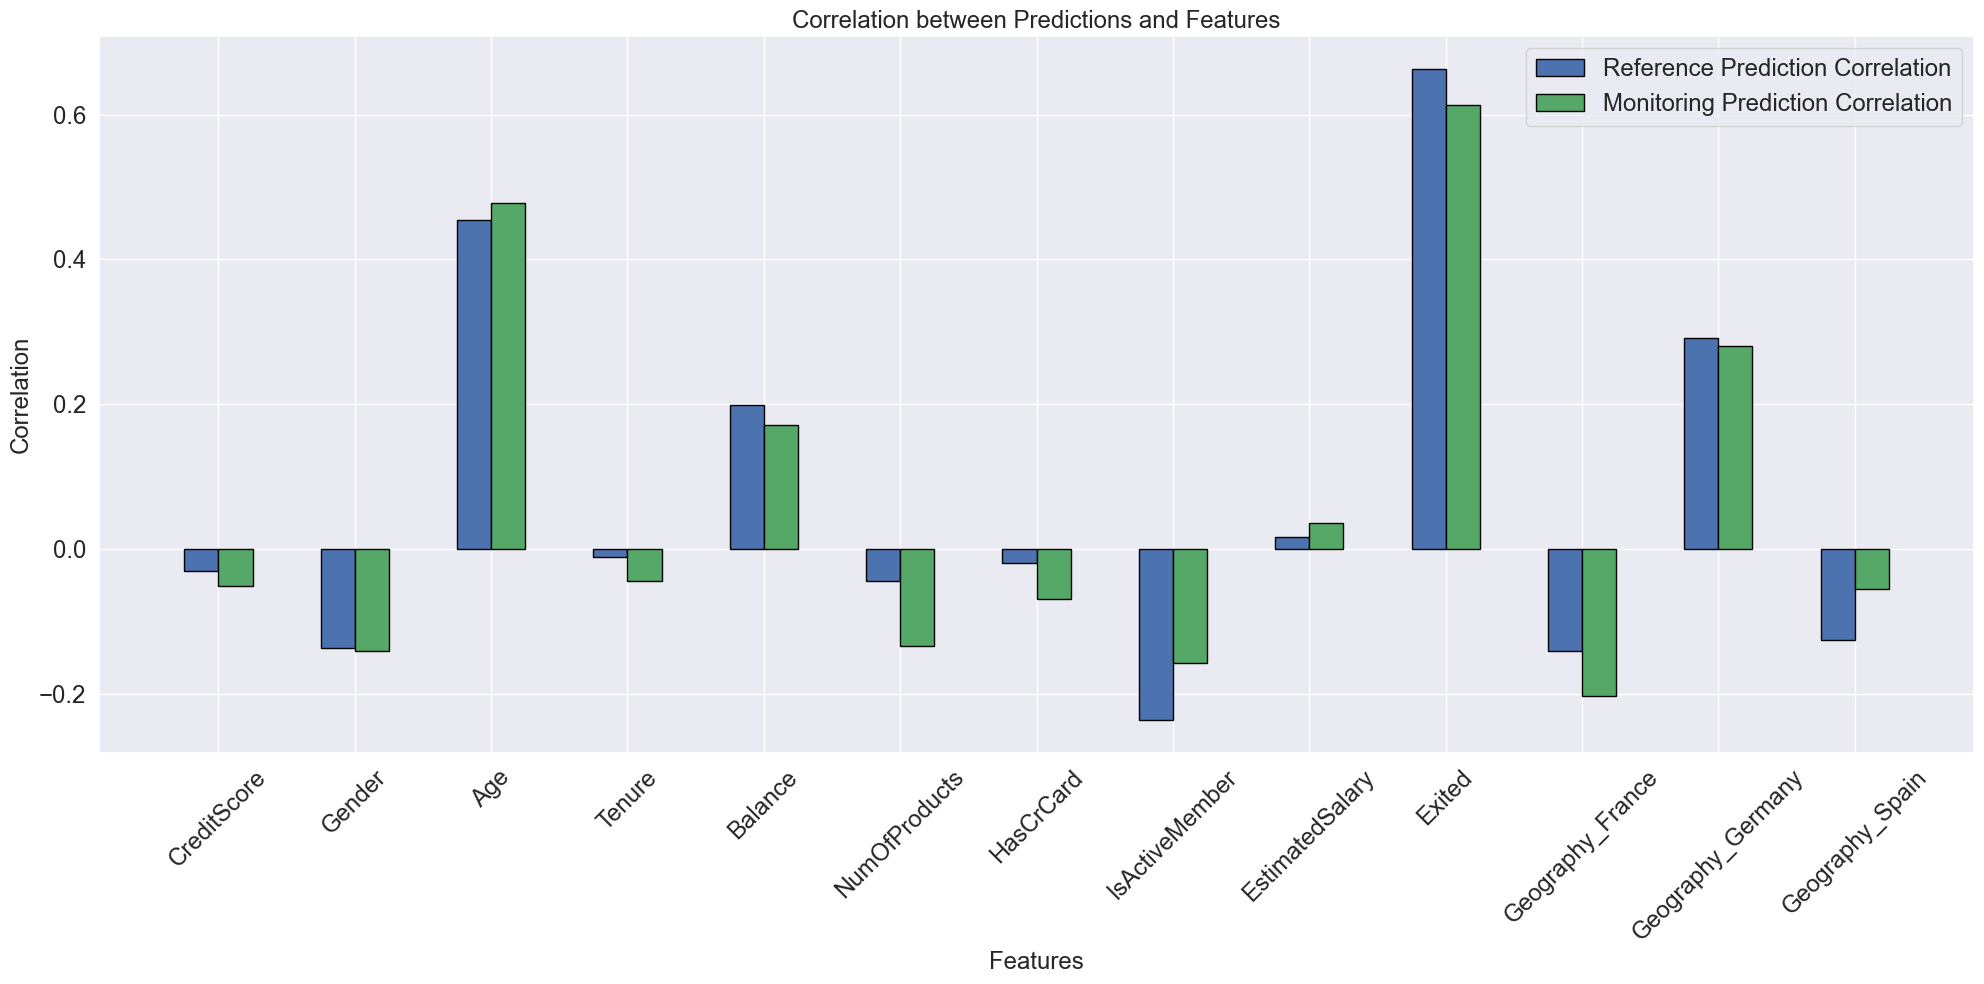

In [37]:
# result = vm.tests.run_test('mr_custom.Prediction_Correlation_Changes',params={'vm_reference_ds':vm_reference_ds,'vm_monitor_ds':vm_monitor_ds},show=False).log(section_id='comparison_data_target')

Finally for target drift, let's plot each prediction value and feature grid side by side


In [38]:

@vm.test("mr_custom.Prediction_Across_Each_Feature")
def feature_drift(vm_reference_ds,vm_monitor_ds):

    """ 
    This test shows visually the prediction using reference data and monitoring data across each individual feature. If there are significant differences in predictions across feature values from reference to monitoring dataset then futher investigation is needed
    as the model is producing predictions that are different then what was observed during the training of the model.
    
    """

    df_reference = vm_reference_ds.df
    df_monitoring = vm_monitor_ds.df


    figures_to_save=[]
    for column in df_reference:

        if column == 'model_probabilities' or column == 'model_prediction':
            pass
        else:
            fig, axs = plt.subplots(1,2, figsize=(20,10), sharey='row')

            ax1,ax2 = axs

            ax1.scatter(df_reference[column], df_reference['model_probabilities'])
            ax2.scatter(df_monitoring[column], df_monitoring['model_probabilities'])

            ax1.set_title('Reference')
            ax1.set_xlabel(column)
            ax1.set_ylabel('Prediction Value')

            ax2.set_title('Monitoring')
            ax2.set_xlabel(column)
            figures_to_save.append(fig)
            plt.close()


    return tuple(figures_to_save)

In [39]:
run_test("mr_custom.Prediction_Across_Each_Feature", params={"vm_reference_ds": vm_reference_ds,"vm_monitor_ds":vm_monitor_ds},show=False).log(section_id='comparison_data_target')

2024-07-30 19:10:19,821 - INFO(validmind.vm_models.test.result_wrapper): Test driven block with content_id mr_custom.Prediction_Across_Each_Feature already exists in the document's section


### Next let's add Feature Drift testing (custom test) where the goal is to investigate how/if the features have drifter

Feature Drift needs a custom test as well as there is currently no out-of-the box test in ValidMind, example:


In [40]:
@vm.test("mr_custom.Feature_Drift")
def feature_drift(
    datasets,
    bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    feature_columns=None):

    """ 
    PSI is a measure of how much a population has shifted over time or between two different samples of a population in a single number. It does this by bucketing the two distributions and comparing the percents of items in each of the buckets, resulting in a single number you can use to understand how different the populations are. The common interpretations of the PSI result are:

    PSI < 0.1: no significant population change
    PSI < 0.2: moderate population change
    PSI >= 0.2: significant population change

    """ 
    import pandas as pd
    # Feature columns for both datasets should be the same if not given
    default_feature_columns = datasets[0].feature_columns
    feature_columns = feature_columns or default_feature_columns

    x_train_df = datasets[0].x_df()
    x_test_df = datasets[1].x_df()

    quantiles_train = x_train_df[feature_columns].quantile(
        bins, method="single", interpolation="nearest"
    )
    PSI_QUANTILES = quantiles_train.to_dict()

    DATA = {"test": x_test_df, "train": x_train_df}
    PSI_BUCKET_FRAC = {}
    for table in DATA.keys():
        total_count = DATA[table].shape[0]
        for col in feature_columns:
            count_sum = 0
            for n in bins:
                if n == 0:
                    bucket_count = (DATA[table][col] < PSI_QUANTILES[col][n]).sum()
                elif n < 9:
                    bucket_count = (
                        total_count
                        - count_sum
                        - ((DATA[table][col] >= PSI_QUANTILES[col][n]).sum())
                    )
                elif n == 9:
                    bucket_count = total_count - count_sum
                count_sum += bucket_count
                PSI_BUCKET_FRAC[table, col, n] = bucket_count / total_count


    def nest(d: dict) -> dict:
        result = {}
        for key, value in d.items():
            target = result
            for k in key[:-1]:  # traverse all keys but the last
                target = target.setdefault(k, {})
            target[key[-1]] = value
        return result

    PSI_BUCKET_FRAC = nest(PSI_BUCKET_FRAC)

    PSI_SCORES = {}
    for col in feature_columns:
        psi = 0
        for n in bins:
            actual = PSI_BUCKET_FRAC["test"][col][n]
            expected = PSI_BUCKET_FRAC["train"][col][n]
            psi_of_bucket = (actual - expected) * np.log(
                (actual + 1e-6) / (expected + 1e-6)
            )
            psi += psi_of_bucket
        PSI_SCORES[col] = psi

    psi_df = pd.DataFrame(list(PSI_SCORES.items()), columns=["Features", "PSI Score"])

    psi_df.sort_values(by=["PSI Score"], inplace=True, ascending=False)

    psi_table = [
        {"Features": values["Features"], "PSI Score": values["PSI Score"]}
        for i, values in enumerate(psi_df.to_dict(orient="records"))
    ]

    dataset_ids = f"{datasets[0].input_id} vs {datasets[1].input_id}"




    #add graphical output
    
    bin_table_psi= pd.DataFrame(PSI_BUCKET_FRAC)
    save_fig=[]
    for i in range(len(bin_table_psi)):
        
        x = pd.DataFrame(bin_table_psi.iloc[i]['test'].items(),columns=['Bin','Population % Reference'])
        y = pd.DataFrame(bin_table_psi.iloc[i]['train'].items(),columns=['Bin','Population % Monitoring'])
        xy = x.merge(y,on='Bin')
        xy.index=xy['Bin']
        xy = xy.drop(columns="Bin",axis=1)
        feature_name=bin_table_psi.index[i]

        import matplotlib.pyplot as plt 
        n=len(bins)
        r = np.arange(n) 
        width = 0.25

        fig = plt.figure()

        plt.bar(r, xy['Population % Reference'], color = 'b', 
                width = width, edgecolor = 'black', 
                label='Reference {0}'.format(feature_name)) 
        plt.bar(r + width, xy['Population % Monitoring'], color = 'g', 
                width = width, edgecolor = 'black', 
                label='Monitoring {0}'.format(feature_name)) 


        plt.xlabel("Bin") 
        plt.ylabel("Population %") 
        plt.title("Histogram of Population Differences {0}".format(feature_name)) 
        plt.legend()
        plt.tight_layout()
        plt.close()
        save_fig.append(fig)


    final_psi=pd.DataFrame(psi_table)
    
    
    return (final_psi, *save_fig)

In this case we want to use the train vs. prediction data. 


In [41]:

result = run_test(
    "mr_custom.Feature_Drift",
    inputs={"datasets": [vm_train_ds, vm_monitor_ds]},show=False
).log(section_id='comparison_data_feature')

2024-07-30 19:11:10,879 - INFO(validmind.vm_models.test.result_wrapper): Test driven block with content_id mr_custom.Feature_Drift already exists in the document's section


Now let's finish up by monitoring accuracy - remember in some cases it's not possible to determine accuracy as ground truth may not be available. If this is the case, then pass this testing and focus on the target/feature drift to inform model owners.


In [42]:
for l in vm.get_test_suite(section='model_performance_monitoring').get_default_config():
    print(l)

validmind.model_validation.sklearn.ConfusionMatrix:train_vs_test
validmind.model_validation.sklearn.ClassifierPerformance:train_vs_test
validmind.model_validation.sklearn.PrecisionRecallCurve:train_vs_test
validmind.model_validation.sklearn.ROCCurve:train_vs_test
validmind.model_validation.sklearn.MinimumAccuracy:train_vs_test
validmind.model_validation.sklearn.MinimumF1Score:train_vs_test
validmind.model_validation.sklearn.MinimumROCAUCScore:train_vs_test
validmind.model_validation.statsmodels.GINITable
validmind.model_validation.sklearn.PermutationFeatureImportance:train_vs_test
validmind.model_validation.sklearn.SHAPGlobalImportance:train_vs_test


In [ ]:
#for each of the listed tests we want to use the reference dataset vs monitoring dataset - the true comparison of accuracy
for l in vm.get_test_suite(section='model_performance_monitoring').get_default_config():
    if l=='validmind.model_validation.statsmodels.GINITable':
        vm.tests.run_test(
        "validmind.model_validation.statsmodels.GINITable",
        inputs = {
            "datasets": [vm_reference_ds, vm_monitor_ds],
            "model": vm_model,
        },show=False
        ).log()
    else:
        vm.tests.run_test(
        l, input_grid={
            "dataset": [vm_reference_ds,vm_monitor_ds],
            "model": [vm_model],
        },
        show=False).log()
    print("completed test: {0}".format(l))


completed test: validmind.model_validation.sklearn.ConfusionMatrix:train_vs_test
completed test: validmind.model_validation.sklearn.ClassifierPerformance:train_vs_test
completed test: validmind.model_validation.sklearn.PrecisionRecallCurve:train_vs_test
completed test: validmind.model_validation.sklearn.ROCCurve:train_vs_test
completed test: validmind.model_validation.sklearn.MinimumAccuracy:train_vs_test
completed test: validmind.model_validation.sklearn.MinimumF1Score:train_vs_test
completed test: validmind.model_validation.sklearn.MinimumROCAUCScore:train_vs_test
completed test: validmind.model_validation.statsmodels.GINITable
completed test: validmind.model_validation.sklearn.PermutationFeatureImportance:train_vs_test
completed test: validmind.model_validation.sklearn.SHAPGlobalImportance:train_vs_test


<a id='toc7_'></a>

## Next steps

You can look at the results of this test suite right in the notebook where you ran the code, as you would expect. But there is a better way — use the ValidMind platform to work with your model monitoring documentation.

<a id='toc7_1_'></a>

### Work with your model monitoring documentation

1. From the [**Model Inventory**](https://app.prod.validmind.ai/model-inventory) in the ValidMind Platform UI, go to the model you registered earlier.

2. Click and expand the **Model Development** section.

What you see is the full draft of your model monitoring documentation in a more easily consumable version. From here, you can make qualitative edits to model monitoring documentation, view guidelines, collaborate with validators, and submit your model monitoring documentation for approval when it's ready. 

<a id='toc7_2_'></a>

### Discover more learning resources

We offer many interactive notebooks to help you document models:

- [Run tests & test suites](https://docs.validmind.ai/developer/model-testing/testing-overview.html)
- [Code samples](https://docs.validmind.ai/developer/samples-jupyter-notebooks.html)

Or, visit our [documentation](https://docs.validmind.ai/) to learn more about ValidMind.